Семинар 4_2 (неделя 5): Сбор и очистка данных. Разведочный анализ данных (EDA)
=====
- [Разедочный анализ и визуализация](#title1) (Exploratory Data Analysis (EDA) with Visualization)
- [Выделение признаков](#title2) (Feature Extraction)
- [Моделирование](#title3) (Data Modelling)
- [Предсказания / Вычисления по моделям](#title4) (Model Evaluation)
- [Ансамбли моделей](#title5)

## Подключение зависимостей / Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

### Загрузка датасетов
В состав предлагаемого датасеты включены 2 набора данных:
* Обучающий (```train```) 
* Тестовый (```test```)

Их нужно загрузить в локальные переменные. Загружаем обучающий и тестовый наборы данных с помощью библиотеки ```pandas```, она же - ```pd``` в нашем примере. Для этого используем стандартные метод ```.read_csv(..)```, принимающий на вход путь к файлу с данными.


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Разведочный (исследовательский) анализ <a class="anchor" id="title1"></a>
### Исследуем обучающий набор (train)
Анализ данных и, вообще их исследование, начинается с того, что **просто** глазами **смотрим** на то, что находится внутри .csv файлов. Для этого достаточно вывести на экран первые несколько строк загруженных таблиц. 

Метод ```.head()``` поможет нам в этом. С его помощью печатаем первые 5 строк из обучающей выборки (**train dataset**):

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Результат работы функции - предпросмотр загруженных данных. Рассмотрим внимательнее, что содержится в данном датасете. Ниже представлена краткая информация о каждом из стобцов датасета:

1. **PassengerId:** Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
2. **Survived:** Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
3. **Pclass:** Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
4. **Name:** Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.
5. **Sex:** Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).
6. **Age:** Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
7. **SibSp:** Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
8. **Parch:** Количество родителей детей (Number of parents of children travelling with each passenger).
9. **Ticket:** Номер билета.
10. **Fare:** Сумма, которую заплатил пассажир за путешествие.
11. **Cabin:** Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
12. **Embarked:** Порт отправления данного пассажира.

##### Общее количество записей и столбцов

Помимо примеров данных, нам нужно понимать размерности, т.е. сколько всего строк/столбцов присутсвует в загруженных файлах. 

Свойство ```.shape``` возвращает данную информацию. Так, мы видим, что всего в обучающем наборе содержатся 891 строка/запись и 12 столбцов.

In [4]:
train.shape

(891, 12)

##### Описание обучающего набора

```.describe()``` 
отобразит различные величины, такие как _количесmво_, _среднее_, _среднеквадратичное отклонение_ и т.д. для **численных** типов данных.

Это может быть полезным для понимания распределения значений по датасету и статистики, особенно когда нет возможности просмотреть все записи в виду огромного их количества (_датасет Титаник к ним не относится, т.к. даже 1000 строчек при желании можно просмотреть глазами_). 

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


```.describe(include = ['O'])``` 
отобразит статистики (descriptive statistics) объектного типа. Это нужно для нечисловых данных, когда нельзя просто посчитать максимумы/среднее/и пр. для данных. Мы можем отнести такие данные к категориальному виду.

In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Давайте проанализируем:
* Видно, что сущесвуют дубликаты номеров билетов *Ticket* и переиспользуются каюты *Cabins* (уникальных записей (_unique_) меньше, чем общего количества). Самый большой порядок дубликата билета - "CA. 2343". Он повторился  7 раз. Аналогично, наибОльшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты "C23 C25 C27".
* Также можно заметить, что 644 человека отбыли из порта "S".
* Среди 891 записей, 577 были мужчины (Male) и оставшием женщины (Female).

Используем метод ```.info()```, чтобы увидеть больше информацию о типах данных/структуре в тренировочной выборке.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Можно увидеть, что значение *Age* не задано для большого количества записей. 
* Из 891 строк, возраст *Age* задан лишь для 714 записей.
* Аналогично, Каюты *Cabin* также пропущены для большого количества записей. Только 204 из 891 записей содержат *Cabin* значения.

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Всего 177 записей с пропущенным возрастом (*Age*), 
* 687 записей с пропущенным значение каюты *Cabin* 
* и для 2 записей не заданы порты отправления *Embarked*.

> Результатом проведенного анализа является понимание того, насколько полны данные или нет в заданых датасетах, нужно ли проводитьб до-наполнение данных, можно ли использовать эти данные напрямую и пр.

### Исследуем тестовый датасет (test)

Тестовый набор содержит 418 строк и 11 столбцов.

> Записей в Обучающем наборе = 891
>
> Записей в Тестовом наборе = 418
>
> Всего записей = 891+418 = 1309

Можно увидеть, что около 2/3 от общего количества данных - данные из обучающей выборки (*Train*) и около 1/3 всех данных - тестовые (*Test*).

In [11]:
test.shape

(418, 11)

*Survived* стобец отсутствует в Тестовом наборе.
Мы должны натренировать наш классификатор, используя Тестовый набор и сгенерировать предсказания (*Survived*) для Тестовых данных.

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Есть отсутствующие данные для возраста (*Age*) и в Тестовом наборе тоже.

* Из 418 записей в Тестовом наборе , только в 332 строках присутствует возраст (*Age*).

* *Cabin* также отсутсвуют в большом колчиестве записей. Только 91 строка из 418 содержать значения для поля *Cabin*.

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Всего 86 записей с пропущенным Возрастом (*Age*), 327 записей с пропущенными Каютами (*Cabin*) и 1 записьс пропущенной информацией о Цене *Fare*.

### Зависимости между Признаками (Features) и Ответом (Survival)

В этом разделе, мы анализируем зависимости между разными признаками по отношению к Спасению(*Survival*). Мы увидии как разные значения признаков отображают разные шансы на спасение. Мы также построим разные виды диаграмм, для того, чтобы **представить** наши данные и находки.

In [15]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


#### Pclass vs. Survival

Пассажиры более высокого класса имеют бОльшие шансы на спасение.

In [16]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

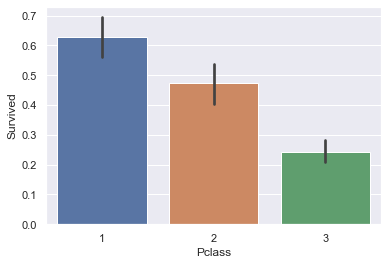

In [20]:
#train.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train)

#### Sex vs. Survival

Женщины имеют бОльшие шансы на спасение.

In [21]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

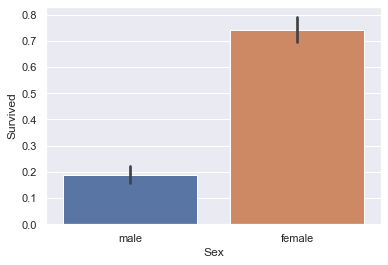

In [24]:
#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=train)

#### Pclass & Sex vs. Survival

Ниже, мы просто находим, сколько мужчин и женщин в каждом Классе (*Pclass*). Затем мы строим столбцовую диаграмму с полученной информацией . Мы обнаруживамем, что среди пассажиров 3 Класса больше мужчин.

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

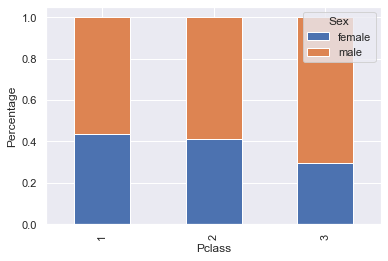

In [31]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


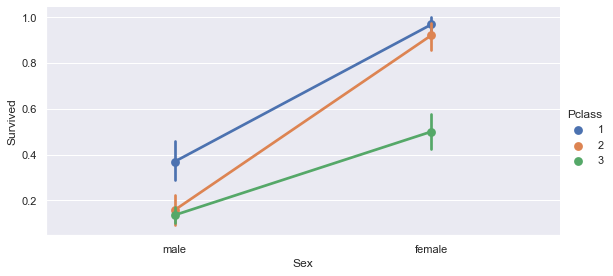

In [32]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', height=4, aspect=2, data=train)

Из графика выше, можем видеть, что :
- Женщины из 1го и 2го Классов (Pclass) имеют практически 100% шансы на спасение. 
- Мужчины из 2го и 3го Классов (Pclass) имеют только около 10% шансов на спасене.

-------
### Задание для самостоятельной работы

Необходимо построить и качественно проанализировать (самостоятельно) следующие зависимости в данных:
* [ ] Embarked vs. Survival
* [ ] Pclass vs. Embarked vs. Survival
* [ ] Parch vs. Survival
* [ ] SibSp vs. Survival
* [ ] Age vs. Survival
-------

#### Pclass, Sex & Embarked vs. Survival

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


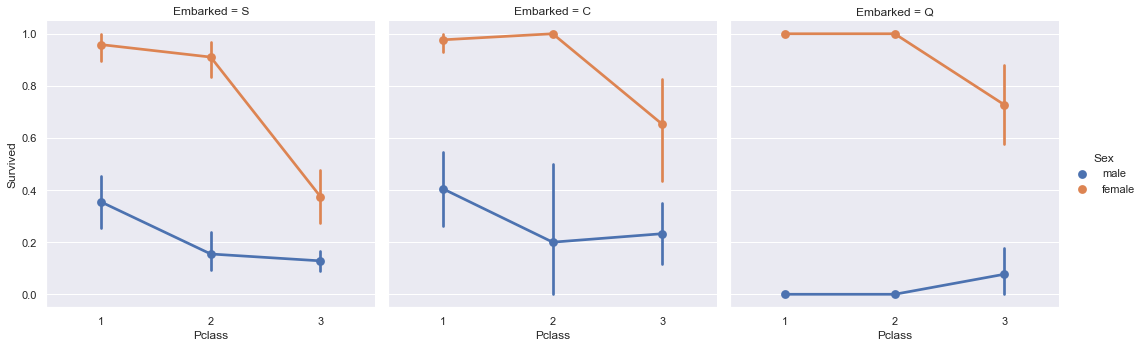

In [33]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

Из этого графика можно увидеть, что :
- Почти все женщины из 1го и 2го Класса спаслись.
- Жертвы серди женщин были в основном из 3 класса.
- Мужчины только из 1 класса имеют несколько большие шансы на спасение, чем из 2го и 3го Классов.

Давайте посмотрим, есть ли какая-либо зависимость от пунтка отправления. Для этого необходимо обратиться к карте следования Титаника. S - порт Саутгемптона, является первым на пути следования, С - Шербург - второй порт посадки пассажиров, Q - Квинстаун - последний по пути отправления.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/%28ru%29_Titanic_voyage_map.svg/1920px-%28ru%29_Titanic_voyage_map.svg.png)

Есть ли какая-то зависимость от порта посадки? Исходя из графиков мы видим, что вероятность спасения женщин увеличивается по всем классам пассажирова с более поздним портом посадки. У мужчин эта логика не срабатывает для порта Квинстауна только. Вполне возможно, что это связано с загрузкой пассажиров, когда более поздние занимают места на более высоких палубах (аналогия - погрузка пассажиров в самолет), чтобы и центр масс был ниже и последующие пассажиры не мешалии не проходили мимо уже расположившихся.

#### Embarked vs. Survived

In [34]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [36]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

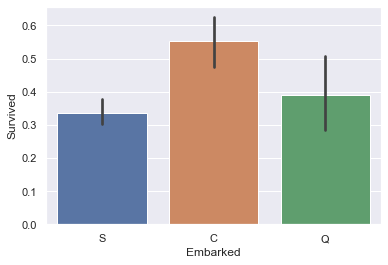

In [37]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)

#### Parch vs. Survival

In [38]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [31]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

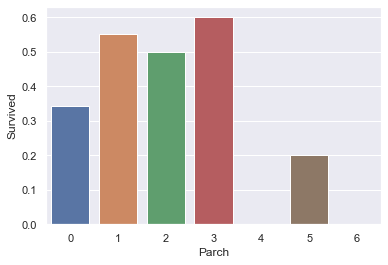

In [32]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

#### SibSp vs. Survival

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [35]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

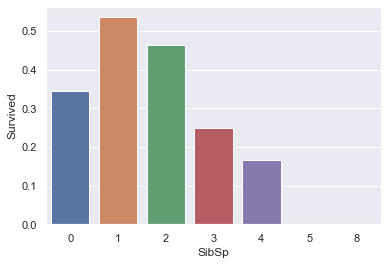

In [36]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

#### Age vs. Survival

<AxesSubplot:xlabel='Sex', ylabel='Age'>

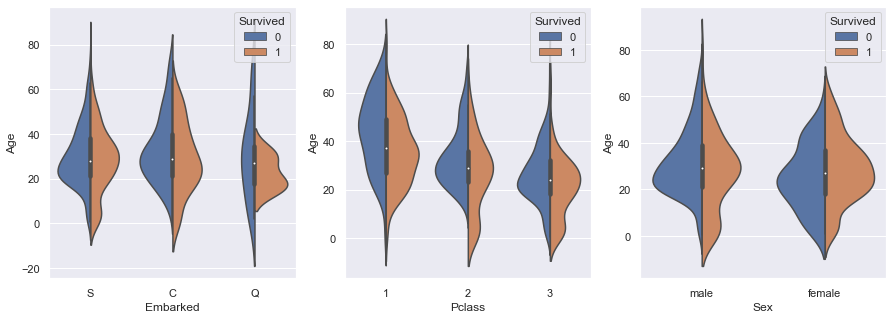

In [37]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

Из графика (```.violinplot(..)```) по переменной *Pclass* можно увидеть, что:
- 1st Pclass пассажиры имеют очень маль детей по сравнению с двумя другими классами.
- 1st Plcass пассажиры по возрасту намного старше по сравнению с двумя другими классами.
- Почти все дети (в возрасте от 0 до 10) пассажиров 2го класса спаслись.
- Большинству детей пассажиров 3го класса удалось спастись.
- Более молодые люди из первого класса спасались по сравнению к более пожилым.

Из графика (=violinplot) по полу *Sex* можно увидеть, что:
- Большинство детей мужского пола (в возрасте от 0 до 14) спаслись.
- Девушки и жещины в возрасте от 18 до 40 имели (в оригинале - имеют) больший шанс на спасение.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Male Age'>

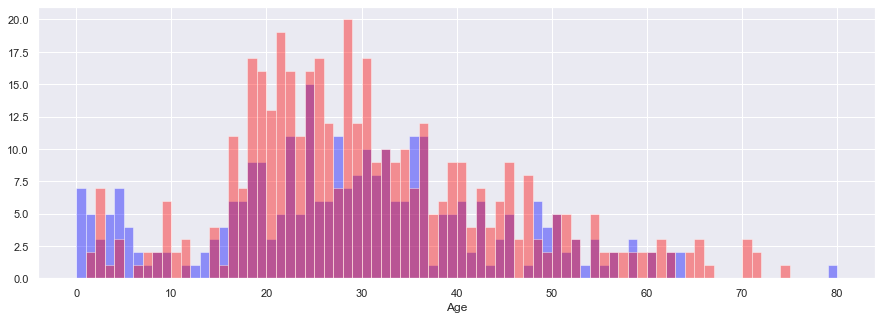

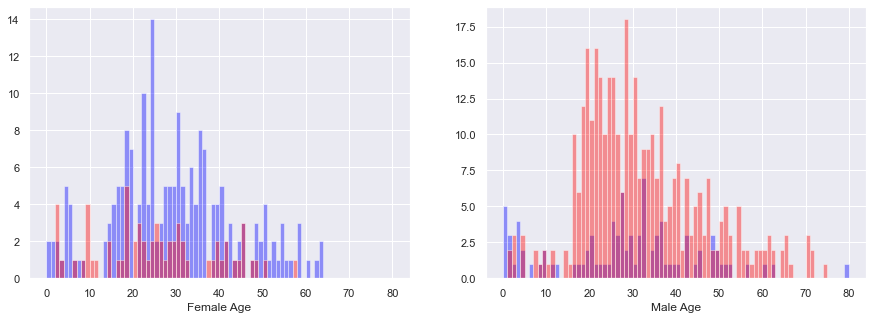

In [38]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')


Из графиков сверху следует, что:
- Объединя вместе пассажирова мужского и женского полов, можно заметить, что дети в возрасте от 0 до 5 лет имеют больше шансов на спасение.
- Девушки/Женщины в возрасте от "18 до 40" и "старше 50" имеют более высокие шансы.
- Мальчики/Юноши в возрасте от 0 до 14 имеют большие шансы на спасение.

### Корреляция признаков

*Что нам это дает?* - с помощью подобного инструмента мы можем оценить зависимости между данными. Так "тепловая" карта корреляций разных признаков отображает:

> **Положительные** значение = Положительные корреляция, т.е. возрастание по одному признаку соответсвует возрастанию по другому признаку и наоборот.
>
> **Орицательные** значения = Обратные/Негативные корреляции, т.е. возрастание по одному признаку, влечет уменьшение иного, и наоборот.

В нашем случае, мы фокусируемся на тех признаках, которые имеют сильные положительные и отрицательные корреляции с признаком *Survived*. 

>Почему?  Потому что это означает, что прогнозирование значения *Survived* (а именно это и надо предсказать) имеет прямую зависимость с признакми с положительное корреляцией, и обратную - с отрицательными, т.о. если мы инвертируем обратные значения, то они тоже перейдут в разряд положительных корреляций.

<AxesSubplot:>

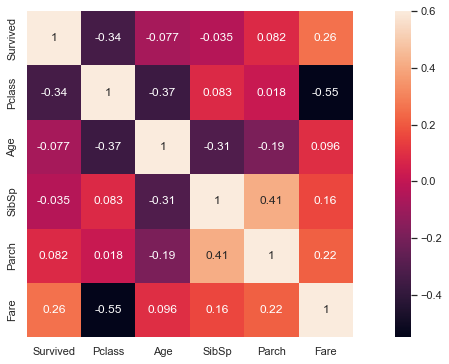

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

## Выделение признаков (Feature Extraction) <a class="anchor" id="title2"></a>

В этом разделе, мы выбираем соответствущие признакова для тренировки классификатора. Здесь, мы создадим новые признаки, основываясь на существующихю. Также мы приведем категориальные признаки к числовому виду.

#### Признак Обращения

Если посмотреть на то, как заданы имена в датасете, то можно заметить, что имена предворяются обращениями/титулами (напр. *Mr.*, *Dr.*, *Ms.*, и т.д.). Это может добавить доп. информации о персоне - статус, положение в обществе и пр., по крайней мере, как они были записаны в билетах. Давайте начнем с того, что извлечем "Обращения" из столбцов имен (колонка *Name*).


In [40]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Как можно видеть выше. мы добавили новый столбец *Title* в обучающий датасет и заполнили его значениями из поля *Name*.

In [42]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Количество пассажиров в уникальным Обращениями показаны выше.

Теперь заменим некоторые не столь широко используемые Обращения значением "Other".

In [43]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


После этого мы конвертируем категориальный признак *Title* в числовой вид. Для этого строим таблицу соответствий:

| Категориальный признак | Значение|
| ------------- |-------------|
| Mr | 1 |
| Miss | 2 |
| Mrs | 3 |
| Master | 4 |
| Other | 5 |

```.map()``` реализует такой маппинг следующим образом:

In [44]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### Sex 

Конвертируем катгориальное значение *Sex* в численное представление. 0 - предстваляет женский пол, 1 - мужской.

In [46]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


#### Embarked 

В датасетах присутствуют в столбцах *Embarked* пустые значения ("nan"). Есил так их и оставить, либо же заменить на значение "n/a", то оно будет восприниматься алгоритмами наравне с остальными значениями данного признака. ЭТо может быть не совсем корректно, с точки зрения задачи. 

In [48]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Сначала проверим количество пассажиров для каждой категории *Embarked*.

In [49]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Обнаруживаем, что категория "S" содержит максимальное количество пассажиров. Посему, заменяем пустые значения "nan" значением "S".

In [50]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Теперь можно произвести преобразование и првиести значение *Embarked* к численному виду. Ставим в соответствие 0 - "S", 1 - "C" и 2 - "Q".

In [52]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


#### Age

Сначала заполняем все пустые (NULL) значение возраста (*Age*) произвольным числом их диапазона от (mean_age - std_age) и до (mean_age + std_age). 

После создадим новый столбец и назовем его *AgeBand*. Он будет содержать категоризированное значение возраста, распределенное по 5ти разным группам.

In [54]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.531532
1   (16.0, 32.0]  0.351770
2   (32.0, 48.0]  0.375000
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/var/folders/2c/kw3lh5js6mjchx1pyrnv2ytw0000gp/T/ipykernel_9447/2747196832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


Теперь ставим в соответствие каждому (*Age*) группу возрастов (*AgeBand*).

>*Цель данной операции* - сократить множество возможных значений возрастов. Иначе это усложнит работу алгоритма, т.к. он (алгоритм) будет вынужден ориентироваться на конкретные значения возрастов при производстве прогнозных значений. Это для задачи не так существенно, т.к. с точки зрения влияние на признак *Survived* м.б. не так важно, сколько лет было пассажиру - 61 или 62 (например).

In [56]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


#### Fare

Заменяем пропущенные значения *Fare* усредненными/медианными значениями *Fare*.

> Здесь и ранее - идея заменять пропущенные значения какими-то усредненными величинами обосновывается стремлением оставить распределение а данных примерно таким же, и не генерировать граничных/экстремальных значений, т.к. подобные выбросы могли бы увести алгоритмы прогнозирования в сторону от реального решения, давая не существующие ориентиры (например если бы мы заменили значение *Fare* - экстремально большим/малым значением по отношению к другим, и *Survived* был бы 1/0, то это дало бы ложный след для алгортимов машинного обучения, что надо увеличивать вес и значимость признака *Fare*, хотя на самом деле просто так совпало)


In [57]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

Создаем столбец *FareBand*. Разделяем значения *Fare* на 4 категории.

In [58]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


Делаем маппинг между *Fare* и *FareBand*

In [60]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


#### SibSp & Parch

[ ] - сделать самостоятельно: создать на базе *SibSp* и *Parch* новый признак, отражающий размер семьи - *FamilySize*.

In [61]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


[ ] - Самостоятельно: проанализировать влияение полученного признака

About data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

[ ] Самостоятельно - разработать новый признак *IsAlone*. Проанализировать, как значение данного признака влияет на шанс спасения, по сравнению с пассажирами с *FamilySize*.

In [62]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Что показывает, что путешествующие водиночку имеют лишь 30% шанс на спасение.

In [63]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0


In [64]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,2,1,1,1


### Отбор признаков

Убираем ненужные столбцы/признаки и сохраняем только те, который будем использовать в эксперименте прогнозирования. Столбец *PassengerId* удаляется только из тренировочного датасета, посколько в Тестовом датасете нужно будет формировать отчет PassengerId - Survived при отправке файла с результатами в Kaggle.

In [65]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [66]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


Снова построим матрицу корреляци признаков

<AxesSubplot:>

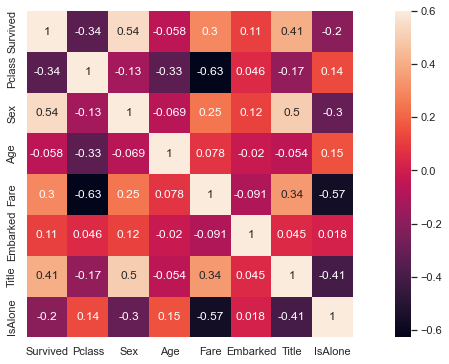

In [68]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

## Ссылки

Оригинальный ноутбук был подготовлен изучая следующие:

- [A Journey through Titanic](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Pytanic](https://www.kaggle.com/headsortails/pytanic)
- [Titanic best working Classifier](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)
- [My approach to Titanic competition](https://www.kaggle.com/rafalplis/my-approach-to-titanic-competition)